In [4]:
# this notebook does magnetometer stuff (data from HAPI INTERMAGNET)
# !pip install bezpy

In [5]:
#importing neccessary modules
import numpy as np
import matplotlib.pyplot as plt
import bezpy

%matplotlib inline

In [8]:
## data from FRD (Fredricksburg)

# Python 2.7 and 3 compatible
# Report software bugs/issues/feature requests at
# https://github.com/hapi-server/client-python/issues
# Report data server issues to e_ginman@bgs.ac.uk

# Install latest hapiclient package from https://pypi.org/project/hapiclient/
# Only needs to be executed once.
#import os; print(os.popen('pip install hapiclient --upgrade').read())

from hapiclient import hapi

server = 'https://imag-data.bgs.ac.uk/GIN_V1/hapi'
dataset = 'frd/best-avail/PT1S/xyzf'
# Notes:
# 1. Use parameters='' to request all parameters from frd/best-avail/PT1S/xyzf.
# 2. Multiple parameters can be requested using a comma-separated
#    list, e.g., parameters='Field_Vector,Field_Magnitude'
parameters = ''
start = '2024-05-10' # min 2018-10-09T00:00:00Z
stop = '2024-05-13' # max 2024-10-04T01:14:11Z
opts       = {'logging': True}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)

hapi(): Running hapi.py version 0.2.6
hapi(): file directory = /tmp/hapi-data/imag-data.bgs.ac.uk_GIN_V1_hapi
hapi(): Reading /tmp/hapi-data/imag-data.bgs.ac.uk_GIN_V1_hapi
hapi(): Writing frd@forwardslash@best-avail@forwardslash@PT1S@forwardslash@xyzf___.json 
hapi(): Writing frd@forwardslash@best-avail@forwardslash@PT1S@forwardslash@xyzf___.pkl 
hapi(): Reading https://imag-data.bgs.ac.uk/GIN_V1/hapi/capabilities
hapi(): Writing https://imag-data.bgs.ac.uk/GIN_V1/hapi/data?id=frd/best-avail/PT1S/xyzf&parameters=&time.min=2024-05-10Z&time.max=2024-05-13Z&format=binary to frd@forwardslash@best-avail@forwardslash@PT1S@forwardslash@xyzf__20240510_20240513.bin
hapi(): Reading and parsing frd@forwardslash@best-avail@forwardslash@PT1S@forwardslash@xyzf__20240510_20240513.bin
hapi(): Writing /tmp/hapi-data/imag-data.bgs.ac.uk_GIN_V1_hapi/frd@forwardslash@best-avail@forwardslash@PT1S@forwardslash@xyzf__20240510_20240513.pkl
hapi(): Writing /tmp/hapi-data/imag-data.bgs.ac.uk_GIN_V1_hapi/frd@fo

In [9]:
B_vector = data["Field_Vector"]
Bx = B_vector[:, 0]  # x-component
By = B_vector[:, 1]  # y-component
Bz = B_vector[:, 2]  # z-component

# Calculate the field magnitude
B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)
B_magnitude

array([50333.41052821, 50333.40865225, 50333.39884221, ...,
       50343.23479129, 50343.21637287, 50343.19905964])

In [10]:
dir(data)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

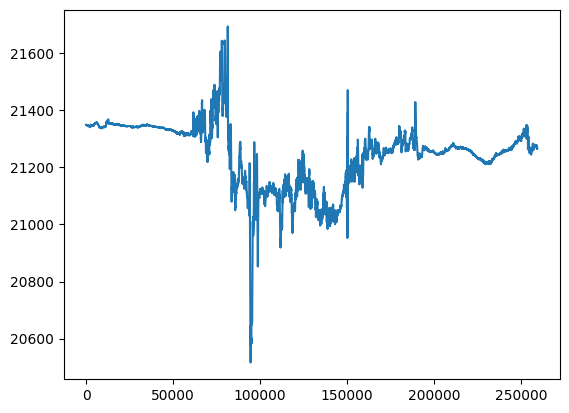

In [22]:
plt.plot(B_vector[:, 0])

In [12]:
B_vector.shape

(259200, 3)

In [7]:
# Read xml files from alligator river nc
site = bezpy.mt.read_xml("NCS61c_FRDcoh.xml")
site.name
site.rating

# Site coords
site_xys = [(site.latitude, site.longitude)]

3

In [13]:
# Get Ex and Ey
Ex, Ey = site.convolve_fft(Bx, By, dt=60)

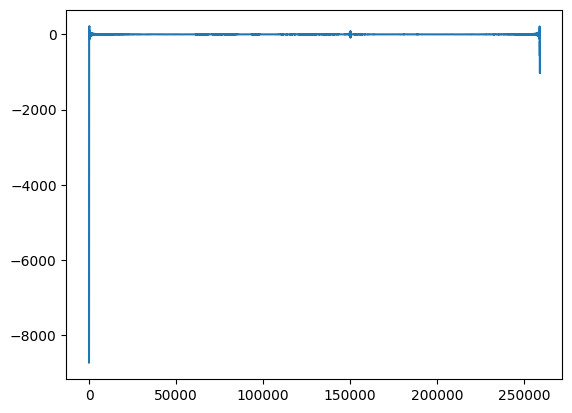

In [15]:
# You do realize the artifacts/noise that Bob mentioned??
plt.plot(Ey)

In [23]:
## data from OTT (Ottawa)

# Python 2.7 and 3 compatible
# Report software bugs/issues/feature requests at
# https://github.com/hapi-server/client-python/issues
# Report data server issues to e_ginman@bgs.ac.uk

from hapiclient import hapi

server     = 'https://imag-data.bgs.ac.uk/GIN_V1/hapi'
dataset    = 'ott/best-avail/PT1S/xyzf'
# Notes:
# 1. Use parameters='' to request all parameters from ott/best-avail/PT1S/xyzf.
# 2. Multiple parameters can be requested using a comma-separated
#    list, e.g., parameters='Field_Vector,Field_Magnitude'
parameters = ''
start      = '2024-05-10' # min 2007-10-17T00:00:00Z
stop       = '2024-05-13' # max 2024-10-03T01:24:13Z

data, meta = hapi(server, dataset, parameters, start, stop)

from hapiplot import hapiplot
hapiplot(data, meta)

# Notes:
# 1. To convert ISO 8601 strings the primary time parameter to Python
#    datetimes, use
#      from hapiclient import hapitime2datetime
#      time_name = meta["parameters"][0]["name"] # Primary time parameter is always first.
#      Time = hapitime2datetime(data[time_name])
# 2. Details about the data and metadata structures `data`
#    and `meta` are given at 
#    https://github.com/hapi-server/client-python-notebooks/blob/master/hapi_demo.ipynb
# 3. Many examples for using `data` and `meta` with other
#    Python libraries (e.g., Pandas, Numpy, Astropy) are given
#    in above-referenced notebook.

ModuleNotFoundError: No module named 'hapiplot'

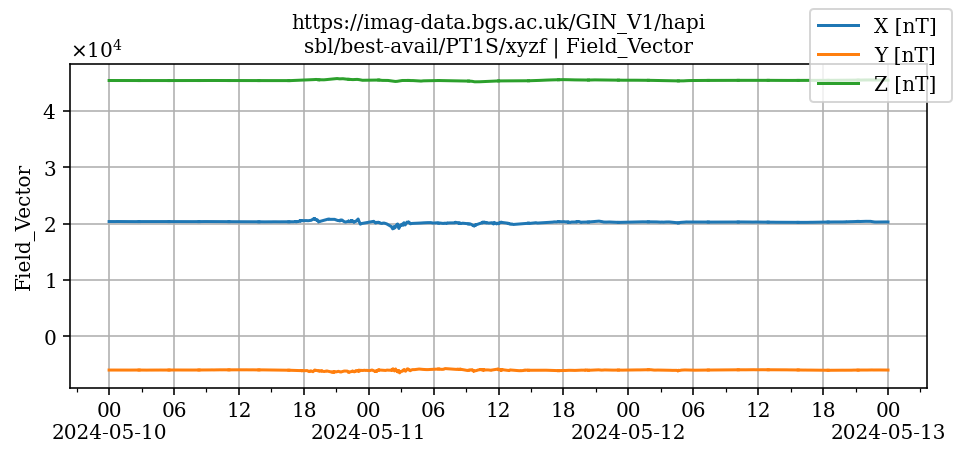

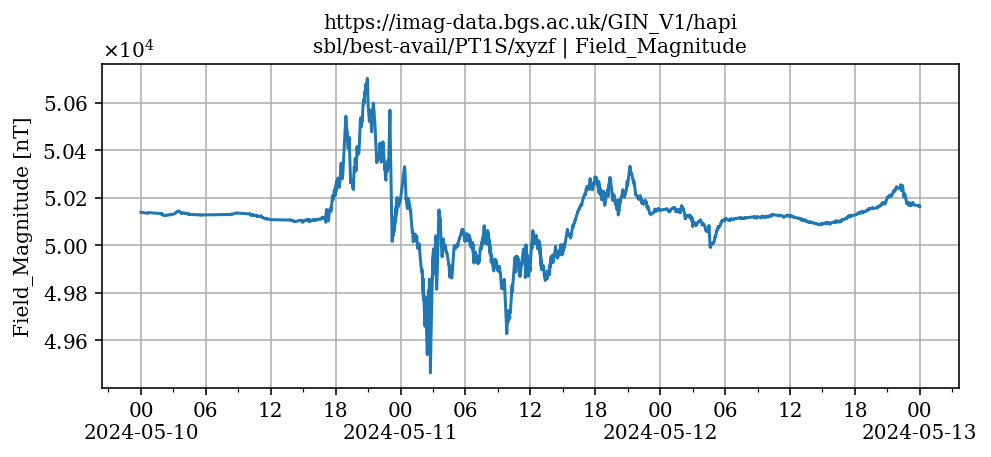

{'HAPI': '3.1',
 'status': {'code': 1200, 'message': 'ok'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'length': 20,
   'units': 'UTC',
   'fill': None,
   'description': 'The UTC date and time for the data from Sable Island, Canada (SBL)',
   'label': 'Date/time'},
  {'name': 'Field_Vector',
   'type': 'double',
   'size': [3],
   'units': ['nT', 'nT', 'nT'],
   'coordinateSystemName': 'Cartesian',
   'vectorComponents': ['x', 'y', 'z'],
   'fill': '99999.0',
   'description': 'The vector value of the magnetic field at Sable Island, Canada (SBL)',
   'label': ['X', 'Y', 'Z'],
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'Field_Magnitude',
   'type': 'double',
   'units': 'nT',
   'vectorComponents': 'r',
   'fill': '99999.0',
   'description': 'The scalar value of the magnetic field from an independent instrument at Sable Island, Canada (SBL)',
   'label': 'F',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}}],
 'startDate': '

In [24]:
## data from SBL (Sable Island)

# Python 2.7 and 3 compatible
# Report software bugs/issues/feature requests at
# https://github.com/hapi-server/client-python/issues
# Report data server issues to e_ginman@bgs.ac.uk

from hapiclient import hapi

server     = 'https://imag-data.bgs.ac.uk/GIN_V1/hapi'
dataset    = 'sbl/best-avail/PT1S/xyzf'
# Notes:
# 1. Use parameters='' to request all parameters from sbl/best-avail/PT1S/xyzf.
# 2. Multiple parameters can be requested using a comma-separated
#    list, e.g., parameters='Field_Vector,Field_Magnitude'
parameters = ''
start      = '2024-05-10' # min 2012-07-23T00:00:00Z
stop       = '2024-05-13' # max 2024-10-03T01:29:30Z

data, meta = hapi(server, dataset, parameters, start, stop)

from hapiplot import hapiplot
hapiplot(data, meta)

# Notes:
# 1. To convert ISO 8601 strings the primary time parameter to Python
#    datetimes, use
#      from hapiclient import hapitime2datetime
#      time_name = meta["parameters"][0]["name"] # Primary time parameter is always first.
#      Time = hapitime2datetime(data[time_name])
# 2. Details about the data and metadata structures `data`
#    and `meta` are given at 
#    https://github.com/hapi-server/client-python-notebooks/blob/master/hapi_demo.ipynb
# 3. Many examples for using `data` and `meta` with other
#    Python libraries (e.g., Pandas, Numpy, Astropy) are given
#    in above-referenced notebook.